# COVID / Unemployment data exploration


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import datetime as dt

In [3]:
# unemployment by industry
#https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410002201
df = pd.read_csv('1410002201_databaseLoadingData_ind2019.csv')

In [4]:
un = df
un = un.loc[un.GEO == 'Canada']
un = un.loc[un.Sex == 'Both sexes']
un = un.loc[un['Age group'] == '15 years and over']
un = un.loc[un['Labour force characteristics'] == 'Unemployment rate']
un = un.loc[un['North American Industry Classification System (NAICS)'] == 'Total, all industries']
un['DATE'] = pd.to_datetime(un.REF_DATE)
un.DATE = un.DATE.dt.strftime("%m")
un19 = un.loc[un.REF_DATE.str.contains("2019")]
un20 = un.loc[un.REF_DATE.str.contains("2020")]

In [5]:
#ind.VALUE.plot()

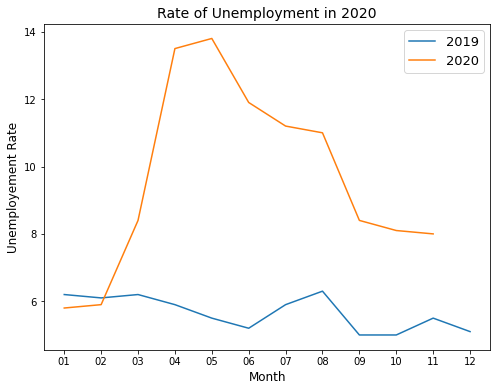

In [6]:
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (8,6))
ax.plot(un19.DATE, un19.VALUE, label = '2019')
ax.plot(un20.DATE, un20.VALUE, label = '2020')
#ax.set_yticks(np.arange(7, 18,2))
#ay_ticks = np.arange(7, 18,1)
#ax.set_yticks(ay_ticks)
plt.title('Rate of Unemployment in 2020', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
#plt.xticks(np.linspace(0,365,13)[:-1], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), size=12)
plt.ylabel('Unemployement Rate', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.show()

In [19]:
mt = df
mt = mt.loc[df.GEO == 'Canada']
mt = mt.loc[df.Sex == 'Both sexes']
mt = mt.loc[df['Age group'] == '15 years and over']
prev = mt.loc[mt.REF_DATE == '2019-04']
curr = mt.loc[mt.REF_DATE == '2020-04']

unemp_prev = (prev.groupby(by='North American Industry Classification System (NAICS)')
                  .mean()
                  .sort_values(by='VALUE', ascending=False)
             )
unemp_curr = (curr.groupby(by='North American Industry Classification System (NAICS)')
                  .mean()
                  .sort_values(by='VALUE', ascending=False)
             )
#unemp_curr

In [20]:
diff = unemp_curr
diff.VALUE = unemp_curr.VALUE - unemp_prev.VALUE
diff.index = diff.index.str.replace(r'\[.*\]', '').str.strip()

#https://www.bls.gov/web/empsit/cpseea31.htm#cps_eande_m31.f.1

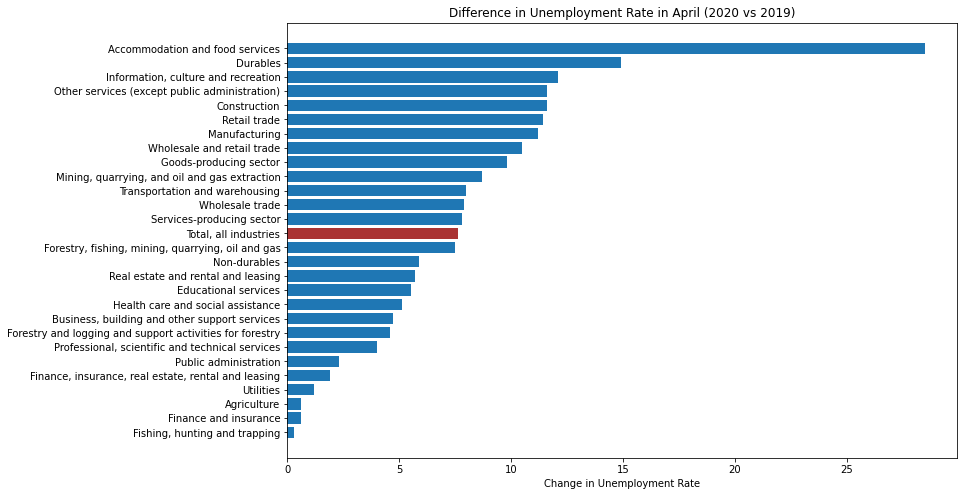

In [21]:

diff = diff.sort_values('VALUE', ascending=False)

fig, ax = plt.subplots(figsize = (12,8)) 
ax.barh(diff.index, diff.VALUE, align='center')
ax.invert_yaxis()
ax.set_xlabel('Change in Unemployment Rate')
ax.set_title('Difference in Unemployment Rate in April (2020 vs 2019)')
highlight = 'Total, all industries'
pos = diff.index.get_loc(highlight)
ax.patches[pos].set_facecolor('#aa3333')

plt.show()

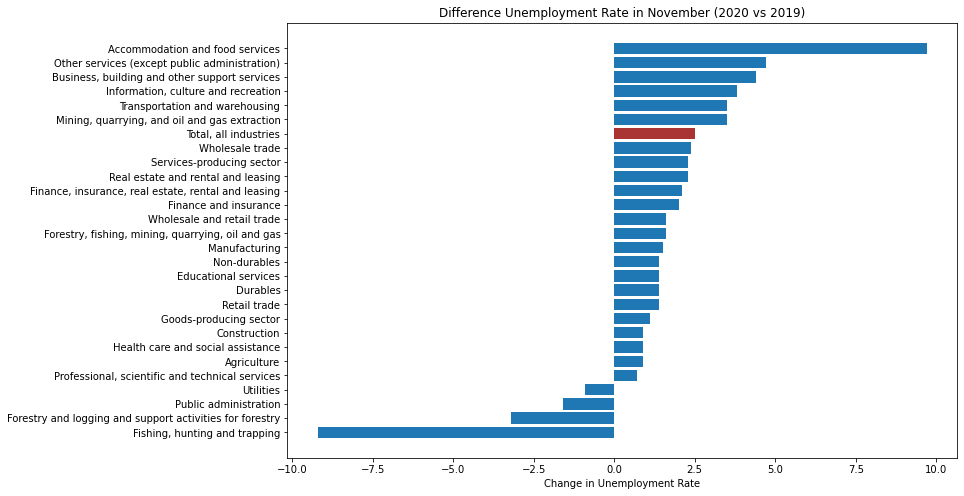

In [18]:
prev = mt.loc[mt.REF_DATE == '2019-11']
curr = mt.loc[mt.REF_DATE == '2020-11']

unemp_prev = (prev.groupby(by='North American Industry Classification System (NAICS)')
                  .mean()
                  .sort_values(by='VALUE', ascending=False)
             )
unemp_curr = (curr.groupby(by='North American Industry Classification System (NAICS)')
                  .mean()
                  .sort_values(by='VALUE', ascending=False)
             )

diff = unemp_curr
diff.VALUE = unemp_curr.VALUE - unemp_prev.VALUE
diff.index = diff.index.str.replace(r'\[.*\]', '').str.strip()

diff = diff.sort_values('VALUE', ascending=False)

fig, ax = plt.subplots(figsize = (12,8)) 
ax.barh(diff.index, diff.VALUE, align='center')
ax.invert_yaxis()
ax.set_xlabel('Change in Unemployment Rate')
ax.set_title('Difference Unemployment Rate in November (2020 vs 2019)')
highlight = 'Total, all industries'
pos = diff.index.get_loc(highlight)
ax.patches[pos].set_facecolor('#aa3333')

plt.show()


In [26]:
ind = df
ind = ind.loc[df.GEO == 'Canada']
ind = ind.loc[ind.Sex == 'Both sexes']
ind = ind.loc[df['Age group'] == '15 years and over']
ind = ind.loc[df.REF_DATE.str.contains('2020')]

industries = ind['North American Industry Classification System (NAICS)'].unique()
#print(industries)
#ind = df.loc[df['North American Industry Classification System (NAICS)'] == 'Total, all industries']
#ind
ind['DATE'] = pd.to_datetime(ind.REF_DATE)
ind.DATE = ind.DATE.dt.strftime("%m")

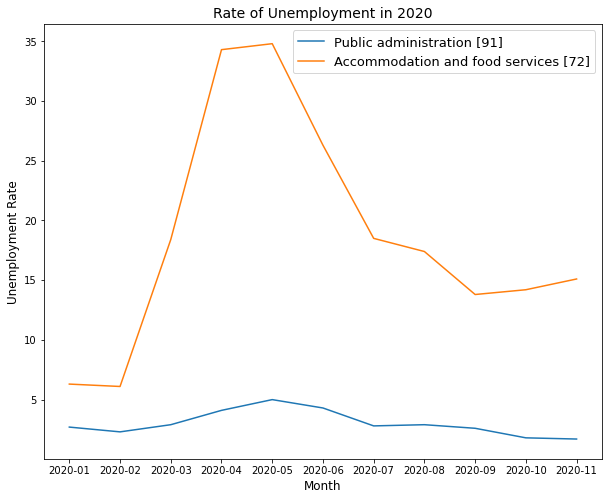

In [28]:
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (10,8))

#for i in industries:
i = 'Public administration [91]'
tmp = ind.loc[df['North American Industry Classification System (NAICS)'] == i]
ax.plot(tmp.REF_DATE, tmp.VALUE, label = i)
i = 'Accommodation and food services [72]'
tmp = ind.loc[df['North American Industry Classification System (NAICS)'] == i]
ax.plot(tmp.REF_DATE, tmp.VALUE, label = i)

plt.title('Rate of Unemployment in 2020', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployment Rate', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.show()